In [2]:
import cv2

In [ ]:
%%time
class FaceDetection:
    """
    Detects a person's face and builds an interactive blue square around it
    """
    def __init__(self, classifier, height, width):
        """
        Class instance attributes
        """
        self.classifier = classifier  
        self.video = cv2.VideoCapture(0)
        self._height = height
        self._width = width
        
        
    def draw_square(self) -> None:
        """
        Draw blue square around people's faces
        """
        self.video.set(3, self._height)  # Set width
        self.video.set(4, self._width)  # Set height
        
        while True:
            ret, frame =  self.video.read()
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            
            # .detectMultiScale() detect faces on the frame
            cascade = cv2.CascadeClassifier(self.classifier)
            faces = cascade.detectMultiScale(image=gray,
                                                   scaleFactor=1.1,
                                                   minNeighbors=5,
                                                   minSize=(30, 30))
            # print(faces)
            
            # Selecting faces with a square on the frame
            # w and h are the width and height of the face rectangle
            for (x, y, w, h) in faces:
                cv2.rectangle(img=frame,
                              pt1=(x, y),
                              pt2=(x + w, y + h),
                              color=(255, 0, 0),
                              thickness=2)
            
            cv2.imshow('Face detection', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    
    
    def close(self) -> None:
        """
        Release video and close all windows
        """
        self.video.release()
        cv2.destroyAllWindows()
        
        
if __name__ == '__main__':
    path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    
    detector = FaceDetection(path, 640, 360)
    detector.draw_square()
    detector.close()

# Methods and classes used:
## [Detect faces](https://opencv-tutorial.readthedocs.io/en/latest/face/face.html)
## [Cascade Classifier](https://www.geeksforgeeks.org/face-detection-using-cascade-classifier-using-opencv-python/)
## [CascadeClassifier.detectMultiScale()](https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php)


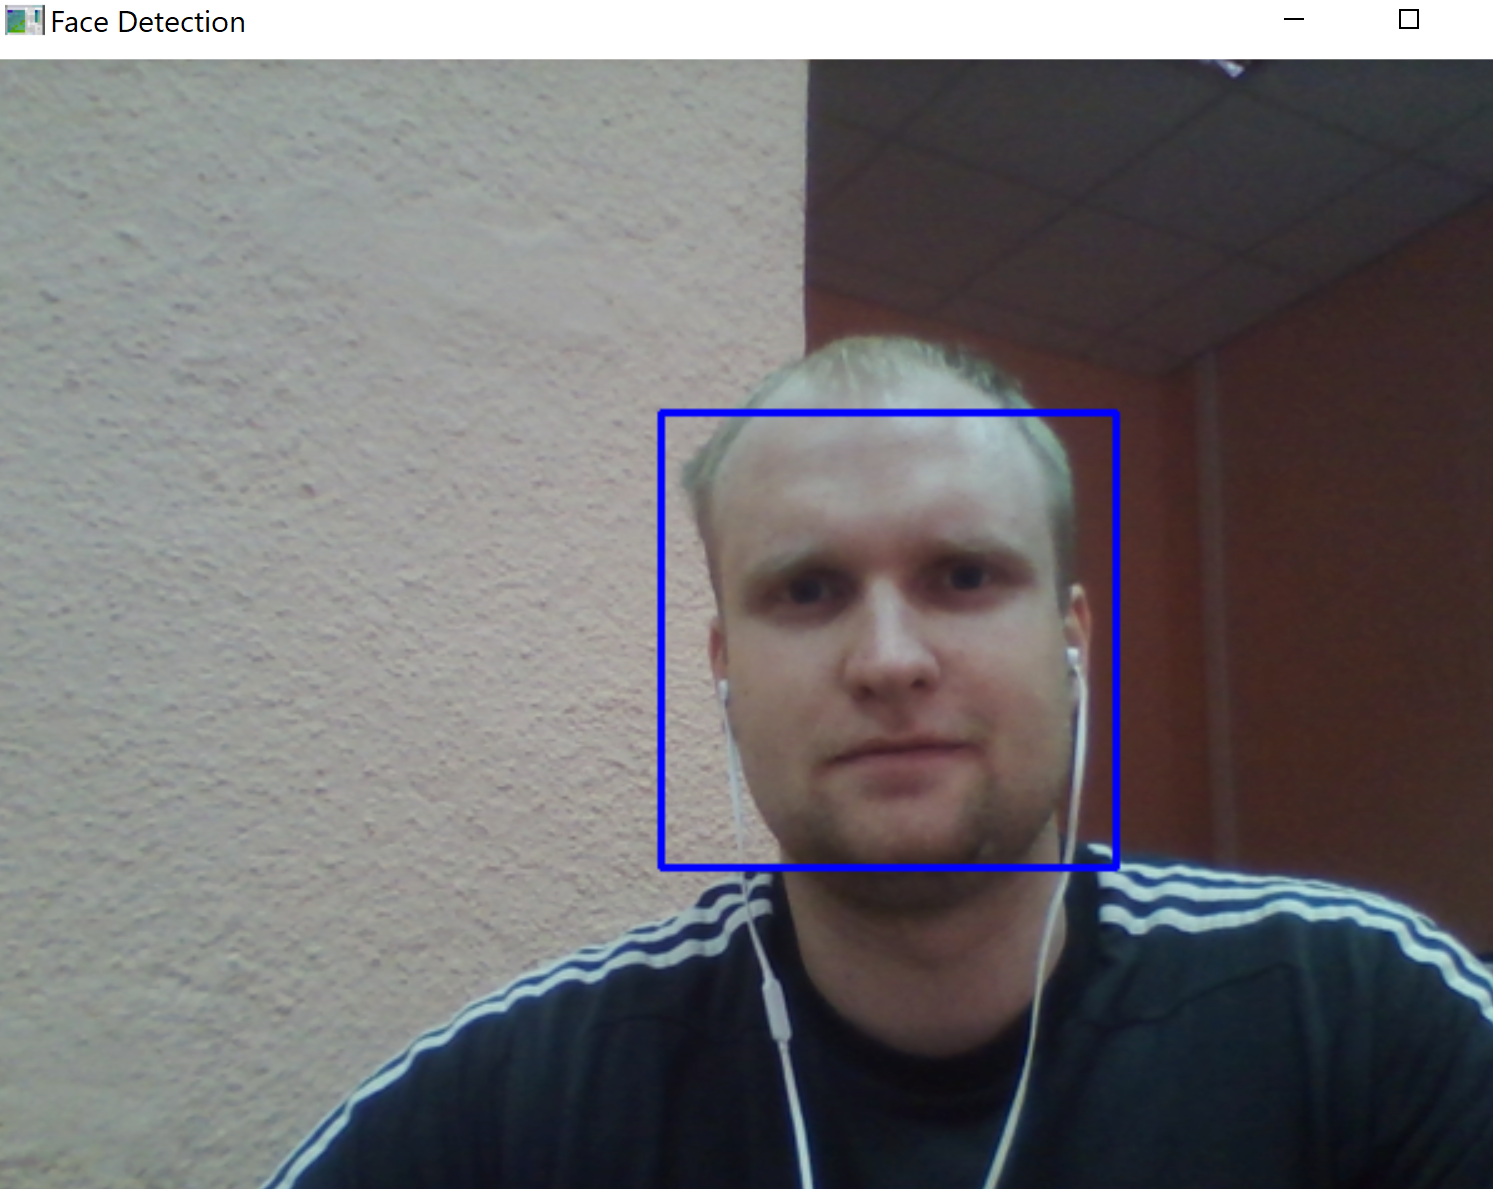